<i>DISCLAIMER:<br>
Bellow code is only for informative purpose, i renounce any responsibility regarding this code and trained model causing loss of money during trading on real market.</i>

# Stock price prediction : AAPL

This page does following:

- load libraries and load stock data as dataframe
- display chart with close price
- add indicators to loaded dataframe
- filter out formations and get its windows
- Export data to csv file

<b>Trading strategy</b><br>
Trading chart: Daily<br>
Trade type: LONG<br>
Stock: AAPL<br>
Entry price: High price of our last formed candle in formation<br>
Exit price: Model is trying to predict High price of newly formed candle after our formation was formed. if predicted price is not reached out, calculation of profit/loss is done on close price of trading candle, it means, we do trade only in a day, trade is closed by end of each session.

We are trading AAPL stock, since it is stable company that has been in up-trend from its foundation.

<b>Trading Data</b><br>
We are loading daily data from yahoo finance from year 2000 until end of 2021.

Bellow condition is trying to make sure we are trading in upper trend. Trades will be done only with long position

<b>Traded formation</b><br>
Condition 1: <i>Last candle high is higher than previous candle high</i><br>
Condition 2: <i>Last candle <b>high</b> is higher than Exponential moving average 4</i><br>
Condition 3: <i>EMA4 is higher than EMA8</i><br>
Condition 4: <i>EMA8 is higher than EMA16</i><br>



We are getting windows from stock dataset, each window has 4 rows (4 candles), 3 rows (formation) + 1 row (label). Our above condition is using only last two candles from formation, however model will be trained on 3 candles, please refer to image bellow.

<b>Trading performance</b><br>
On validation dataset (from 8.2018 - 12.2021, cca 3 years and 4 months) model achieved 31% return, also there must be pointed out, the model does not subtract trading fees, so the return 31% must be decreased by fees broker is charging per each trade.

<b>Trading formation sample</b>

<img src="AAPL Formation.jpg" width=550 height=500 align="left">

<b>Import libraries</b>

In [22]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<b>load data</b>

In [23]:
stock = yf.download('aapl', 
                      start='2000-01-01', 
                      end='2021-12-25', 
                      interval="1d",
                      progress=False,
)
stock.shape

(5532, 6)

<b>Display chart</b>

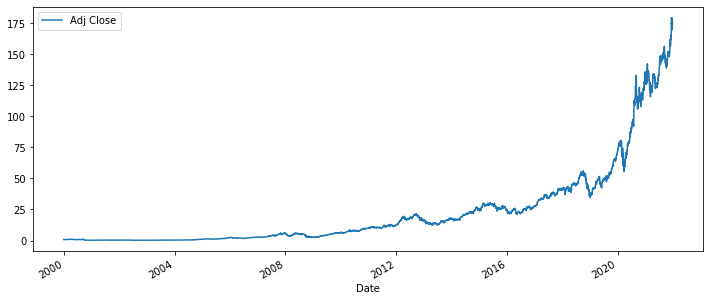

In [24]:
stock['Adj Close'].plot(legend=True,figsize=(12,5))

<b>Add indicators</b>

We are adding exponential moving average for a model to get additional data for training

In [25]:
stock['EMA4'] = talib.EMA(stock['Close'], timeperiod=4)
stock['EMA8'] = talib.EMA(stock['Close'], timeperiod=8)
stock['EMA16'] = talib.EMA(stock['Close'], timeperiod=16)

Remove not needed colls

In [26]:
try:
    stock = stock.drop(labels=['Adj Close','Volume'],axis=1)
except:
    pass
stock.head(6)

,Open,High,Low,Close,EMA4,EMA8,EMA16
Date,,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,NaN,NaN,NaN
2000-01-03,0.936384,1.004464,0.907924,0.999442,NaN,NaN,NaN
2000-01-04,0.966518,0.987723,0.903460,0.915179,NaN,NaN,NaN
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.940290,NaN,NaN
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.903460,NaN,NaN
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.897433,NaN,NaN


Bellow code will select only windows with 4 rows each, that represents formation that is intended to trade. If conditions, representing the formation are True, window is appended to new dataframe train_df. That df is exported as csv file.

In [31]:
temp_df = pd.DataFrame()
final_df = pd.DataFrame()

trades = 0

for row in range(len(stock)):

    if row > 2:
        counter = 0
        
        #Trading Condition
        if (
            (stock.iloc[row-1,1]>stock.iloc[row-2,1])\
        and (stock.iloc[row-1,1] > stock.iloc[row-1,4])\
        and (stock.iloc[row-1,4] > stock.iloc[row-1,5])\
        and (stock.iloc[row-1,5] > stock.iloc[row-1,6])\
        and (stock.iloc[row,1] > stock.iloc[row-1,1])):      
            
            trades += 1
            #Check condition           
#             print("last high: ",stock.iloc[row-1,1])
#             print("2nd high: ",stock.iloc[row-2,1])
#             print("EMA4: ",stock.iloc[row-1,4])
#             print("EMA8: ",stock.iloc[row-1,5])
#             print("EMA16: ",stock.iloc[row-1,6])
            
            temp_df = stock.iloc[row-3:row+1,:]
            
            temp_df['trades'] = trades

            final_df = pd.concat([final_df,temp_df],axis=0)
            

<ipython-input-31-5682423d2dd7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['trades'] = trades


In [32]:
print(final_df.shape)
final_df.head(3)

(4344, 8)


,Open,High,Low,Close,EMA4,EMA8,EMA16,trades
Date,,,,,,,,
2000-01-21,1.020089,1.020089,0.983817,0.993862,0.970014,0.941744,NaN,1
2000-01-24,0.968192,1.006696,0.938616,0.948661,0.961473,0.943281,0.910819,1
2000-01-25,0.937500,1.010045,0.914063,1.002232,0.977776,0.956381,0.921573,1


<b>Save final data in csv format</b>

This csv file is used by following list to trade our model

In [33]:
print("final_df shape: ",final_df.shape)
final_df.to_csv('AAPL_raw.csv')

final_df shape:  (4344, 8)


<b>Save raw stock data in csv format</b>

This is done only for validation purpose of final trades

In [34]:
print("final_df shape: ",stock.shape)
stock.to_csv('AAPL_raw_initial_df.csv')

final_df shape:  (5532, 7)
